In [1]:
import cv2 
import numpy as np 
from IPython.display import Image, display 
from matplotlib import pyplot as plt

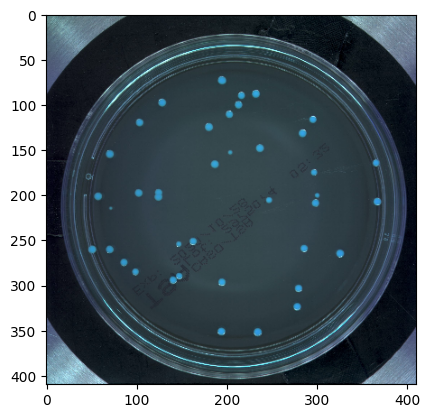

In [2]:
# Plot the image 
def imshow(img, ax=None): 
	if ax is None: 
		ret, encoded = cv2.imencode(".jpg", img) 
		display(Image(encoded)) 
	else: 
		ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) 
		ax.axis('off') 

initial = cv2.imread(r"D:\IMGprocessing_pro\Medical_image_analysis\14618.jpg")
gray = cv2.cvtColor(initial, cv2.COLOR_BGR2GRAY) 
# Show image 
half_ref = cv2.resize(initial, (0, 0), fx = 0.2, fy = 0.2)
plt.imshow(half_ref)
#imshow(half_gray)

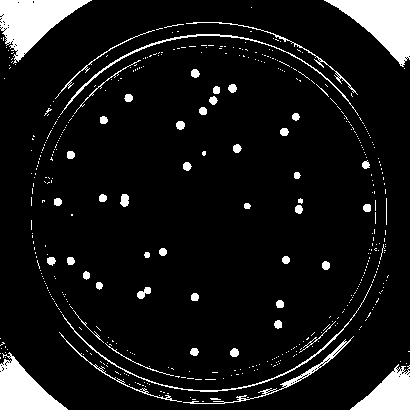

In [6]:
ret,thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
bin_rez = cv2.resize(thresh, (0, 0), fx = 0.2, fy = 0.2)
imshow(bin_rez)

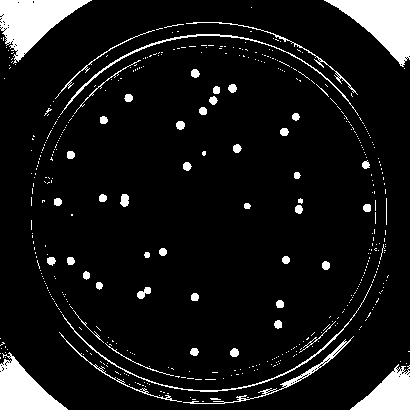

In [7]:
ret,thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
bin_rez = cv2.resize(thresh, (0, 0), fx = 0.2, fy = 0.2)
imshow(bin_rez)

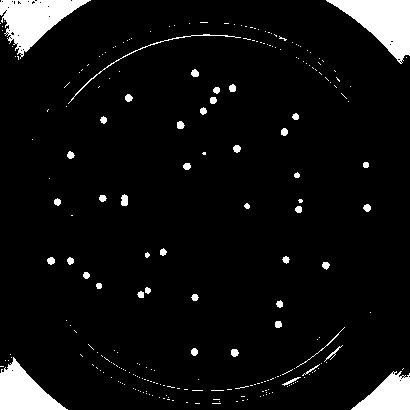

In [8]:
fg = cv2.erode(thresh,None,iterations = 2)
fg_rez = cv2.resize(fg, (0, 0), fx = 0.2, fy = 0.2)
imshow(fg_rez)

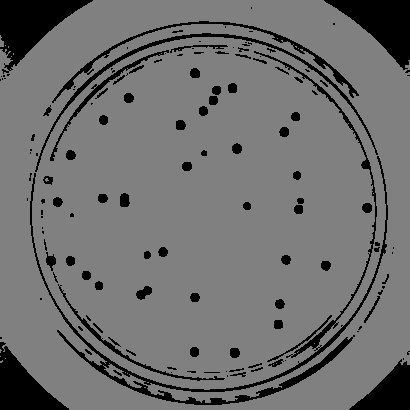

In [9]:
bgt = cv2.dilate(thresh,None,iterations = 3)
ret,bg = cv2.threshold(bgt,1,128,1)
bg_rez = cv2.resize(bg, (0, 0), fx = 0.2, fy = 0.2)
imshow(bg_rez)

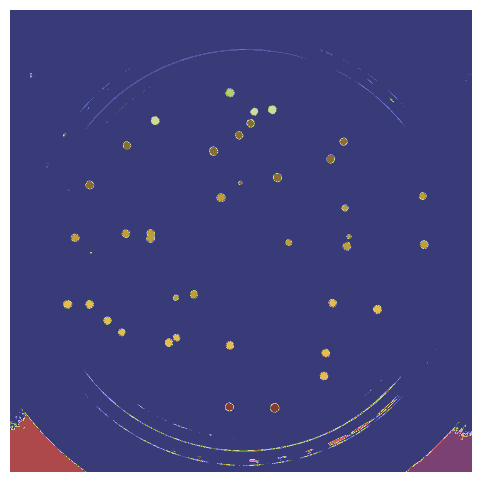

In [10]:
unknown = cv2.subtract(bg,fg) 
ret, markers = cv2.connectedComponents(fg) 

# Add one to all labels so that background is not 0, but 1 
markers += 1
# mark the region of unknown with zero 
markers[unknown == 255] = 0

fig, ax = plt.subplots(figsize=(6, 6)) 
ax.imshow(markers, cmap="tab20b") 
ax.axis('off') 
plt.show()

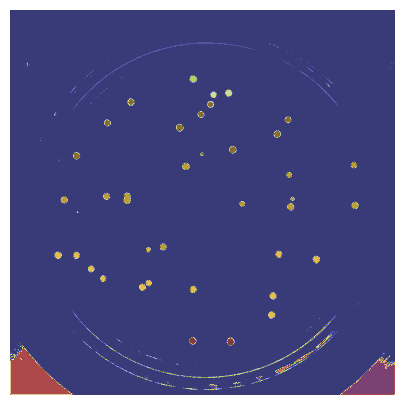

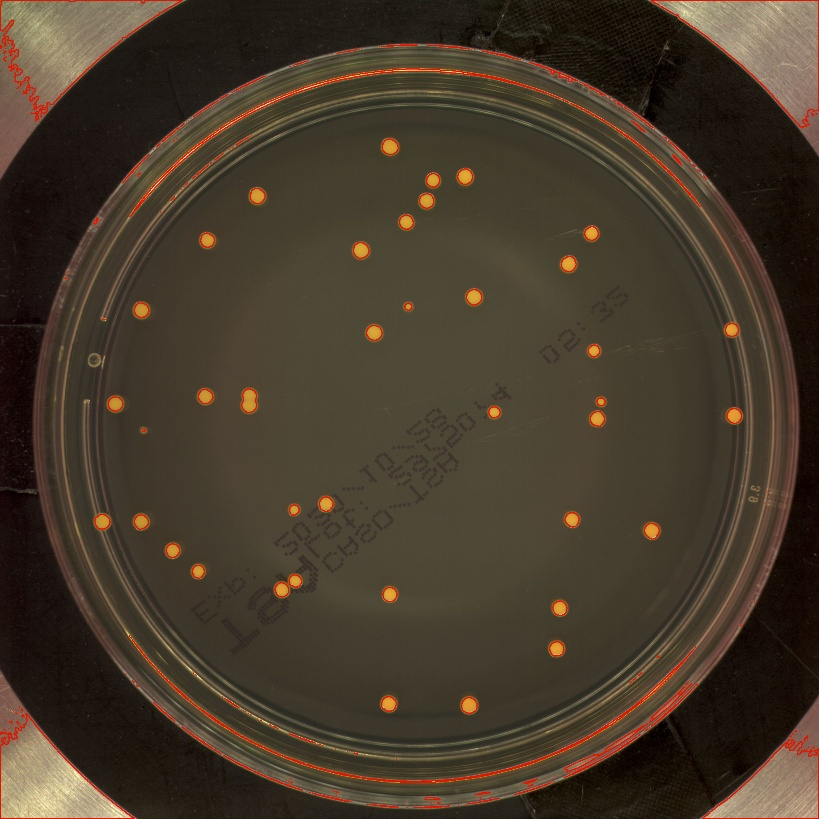

In [11]:
# watershed Algorithm 
markers = cv2.watershed(initial, markers) 

fig, ax = plt.subplots(figsize=(5, 5)) 
ax.imshow(markers, cmap="tab20b") 
ax.axis('off') 
plt.show() 


labels = np.unique(markers) 

cells = [] 
for label in labels[2:]: 

# Create a binary image in which only the area of the label is in the foreground 
#and the rest of the image is in the background 
	target = np.where(markers == label, 255, 0).astype(np.uint8) 
	
# Perform contour extraction on the created binary image 
	contours, hierarchy = cv2.findContours( 
		target, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE 
	) 
	cells.append(contours[0]) 

# Draw the outline 
img = cv2.drawContours(initial, cells, -1, color=(0, 23, 223), thickness=2) 
img_rez = cv2.resize(initial, (0, 0), fx = 0.4, fy = 0.4)
imshow(img_rez)
